## 1 Introduction:Understanding Large Language Models through GPT-2

* Large Language models are a class of deep learning models designed to understand and generate human-like text.
* They're built using the transformer architecture and are widely used in applications like chatbots,translation and text generation


## 2.1 Understanding word embeddings

* Deep neural net models, including LLMs, cannot process raw text directly.
* Since text is categorical, it is not compatible with the mathematical operations used to implement and train neural networks.Therefore we need a way to represent words as continous-valued vectors.
* This concept of converting data into a vector format is referred to embedding.
* In simple terms, an embedding is a mapping from discrete objects, such as words, images, or even entire documents, to points in a convert nonnumeric data into format that neural networks can process.
* Instead of treating each word as a unique symbol, embeddings map words into a continuous vector space where similar words are close together.
* For example, the vectors for "king" and "queen" or "run" and "jog" will be near each other because they share similar meanings. These embeddings are learned from data and capture semantic relationships, making them a fundamental building block in modern NLP models like GPT-2.

## 2.2 Tokenizing text

* LLMs take text as inputs but wait before these words are mapped into embeddings, the go through a stage known as tokenization.
* Tokenization is the process of breaking text into smaller units called tokens- which can be words,subwords, or even characters.
* This step is crucial because language models like GPT-2  don't understand raw text; they work with numbers.
* Tokenization converts texts into sequence of tokens that can be mapped to numerical IDs
* The text we'll tokenizer for LLM training is `The dante's inferno dataset`.
* You can find this dataset from the official project gutenberg website.
* Let's get coding

In [1]:
## downloading dante's inferno dataset from project gutenberg website.
import urllib.request

url = 'https://www.gutenberg.org/cache/epub/41537/pg41537.txt'
file_path = "dante's-inferno.txt"
urllib.request.urlretrieve(url,file_path)

("dante's-inferno.txt", <http.client.HTTPMessage at 0x7fd433358690>)

* Let's load `dante's-inferno.txt` file using python file handling utilities.

In [2]:
with open("dante's-inferno.txt",'r',encoding='utf-8') as f:
  raw_text = f.read()
print("Total number of characters:",len(raw_text))
print(raw_text[:99])

Total number of characters: 700670
﻿The Project Gutenberg eBook of The Divine Comedy of Dante Alighieri: The Inferno
    
This ebook i


* Our goal is to tokenize this 700,670 character long story into individual words and special characters that we can turn into embeddings for LLM training.
* Which option do we have in splitting the texts, in this short story we can use python's regular expression library `re` for illustration purposes.

* Using some simple text we can use `re.split` command with the following syntax to split a text on whitespaces characters.

In [3]:
import re
text = "Hello, world. I am Antonius, nice to meet you."
result = re.split(r'(\s)',text)
print(result)

['Hello,', ' ', 'world.', ' ', 'I', ' ', 'am', ' ', 'Antonius,', ' ', 'nice', ' ', 'to', ' ', 'meet', ' ', 'you.']


* This simple tokenization scheme mostly works for seperating the use case text into individual words, however some are still connected to punctuation characters that we want to have as seperate entities.
* We have also avoided a step in tokenization in which we make all text inputs lowercase because capitalization helps LLMs distinguish between proper nouns and common nouns, understand sentence structure,and learn to geneate text with proper capitalization.


* Let's modify the regular expression splits on whitespaces `(\s)`, commas, and periods ([,.]).

In [4]:
result = re.split(r'([,.] | \s)',text)
print(result)

['Hello', ', ', 'world', '. ', 'I am Antonius', ', ', 'nice to meet you.']


Tokenization works well here but let's increase the diversity of punctuation which our dummy tokenizer can work on e.g question marks, double-slashes.

In [5]:
text = "Hello, world. Is attention is all you need-- a good research paper?"
result = re.split(r'([,.:;?_!"()\']|\s+|--)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'Is', ' ', 'attention', ' ', 'is', ' ', 'all', ' ', 'you', ' ', 'need', '--', '', ' ', 'a', ' ', 'good', ' ', 'research', ' ', 'paper', '?', '']


Now that we have a basic tokenizer working, let's apply it to Dante's Inferno.

In [6]:
preprocessed_text = re.split(r'([,.:;?_!"()\']|\s+|--)',raw_text)
preprocessed_text = [item.strip() for item in preprocessed_text if item.strip()]
print(len(preprocessed_text))

145180


The print statement outputs `145180` tokens in this text(without whitespaces).
Now let's print the first 70 tokens for quick visual check

In [7]:
print(preprocessed_text[:70])

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Divine', 'Comedy', 'of', 'Dante', 'Alighieri', ':', 'The', 'Inferno', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at']


## 2.3 Converting tokens into token IDs

* Now, let's convert these tokens from a Python string to an integer representation to produce the token IDs.
* This step is an intermediate step before converting the token IDs into embedding vectors.

* Since we have tokenized Dante's Inferno and assigned it to Python variable called `preprocessed_text`, let's create a list of all unique tokens and sort them alphabetically to determine the vocabulary size.

In [8]:
all_words = sorted(set(preprocessed_text))
vocab_size = len(all_words)
print(vocab_size)

13909


* After finding out the `vocab_size=13909`, we create the vocabulary and print its first 500 entries.

In [9]:
vocab  ={token:integer for integer,token in enumerate(all_words)}
for i,item in enumerate(vocab.items()):
  print(item)
  if i >= 500:
    break

('!', 0)
('"', 1)
('#41537]', 2)
('$1', 3)
('$5', 4)
("'", 5)
('(', 6)
(')', 7)
('***', 8)
(',', 9)
('-', 10)
('--', 11)
('.', 12)
('000', 13)
('1', 14)
('10', 15)
('100', 16)
('101', 17)
('102', 18)
('103', 19)
('1037', 20)
('104', 21)
('105', 22)
('106', 23)
('107', 24)
('108', 25)
('1085', 26)
('109', 27)
('10th', 28)
('11', 29)
('110', 30)
('1106', 31)
('111', 32)
('1115', 33)
('112', 34)
('113', 35)
('114', 36)
('115', 37)
('1152-1190', 38)
('116', 39)
('117', 40)
('118', 41)
('1180', 42)
('1185', 43)
('119', 44)
('1193', 45)
('1198', 46)
('12', 47)
('120', 48)
('121', 49)
('1215', 50)
('122', 51)
('1220', 52)
('123', 53)
('1238', 54)
('1239', 55)
('124', 56)
('1248', 57)
('1249', 58)
('125', 59)
('1250', 60)
('1252', 61)
('1258', 62)
('1259', 63)
('126', 64)
('1260', 65)
('1261', 66)
('1264', 67)
('1265', 68)
('1266', 69)
('1267', 70)
('1268', 71)
('1269', 72)
('127', 73)
('1270', 74)
('1271', 75)
('1273', 76)
('1275', 77)
('1277', 78)
('1278', 79)
('128', 80)
('1280', 81)
('1281

* We see that, the dictionary contains individual tokens associated with unique integer labels.
* Next we will apply this vocabulary to convert new text into token IDs.

* Let's create a tokenizer class in Python with encode method that splits texts into tokens and carries out string-to-integer mapping to produce token IDs via vocabularies.
* We also include `decode` method that carries out the reverse integer-to-string mapping to convert the token IDs back into text.

In [10]:
import re
class SimpleTokenizer1:
  def __init__(self,vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'([,.:;?_!"()\']|\s|--)', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.:;?_!"()\'])', r'\1', text)

    return text

* Let's test this class using a sample paragraph from Dante's Inferno

In [11]:
##instantiating the SimpleTokenizer1
tokenizer = SimpleTokenizer1(vocab)
text = """CANTO XXXIV. The Ninth Circle--the Fourth Ring or Judecca, the deepest point
of the Inferno and the Centre of the Universe--it is the place
of those treacherous to their Lords or Benefactors--Lucifer with
Judas, Brutus, and Cassius hanging from his mouths--passage
through the Centre of the Earth--ascent from the depths to the
light of the stars in the Southern Hemisphere,"""
ids = tokenizer.encode(text)
print(ids)

[763, 3412, 12, 3024, 2221, 942, 11, 12706, 1433, 2637, 10090, 1830, 9, 12706, 6385, 10524, 10012, 12706, 1763, 4624, 12706, 883, 10012, 12706, 3193, 11, 8933, 8924, 12706, 10451, 10012, 12769, 12969, 12857, 12710, 1958, 10090, 658, 11, 1969, 13708, 1829, 9, 739, 9, 4624, 843, 8244, 7856, 8442, 9748, 11, 10256, 12806, 12706, 883, 10012, 12706, 1233, 11, 4781, 7856, 12706, 6484, 12857, 12706, 9222, 10012, 12706, 12239, 8672, 12706, 2889, 1663, 9]


* Let's see if we can turn these token IDs back into text using the `decode` method.

In [12]:
print(tokenizer.decode(ids))

CANTO XXXIV. The Ninth Circle -- the Fourth Ring or Judecca, the deepest point of the Inferno and the Centre of the Universe -- it is the place of those treacherous to their Lords or Benefactors -- Lucifer with Judas, Brutus, and Cassius hanging from his mouths -- passage through the Centre of the Earth -- ascent from the depths to the light of the stars in the Southern Hemisphere,


* So I guess i works now let's apply it to a new text sample not contained in the training set:

In [13]:
text = "Hello, welcome to Bogota"
##print(tokenizer.encode(text))

* We can see that after we execute this code we get the above error.
* We're getting error because the word `Hello` was not used in `Dante's Inferno` story.
* Hence, it is not contained in the vocabulary.
* This highlights the need to consider large and diverse training sets to extend the vocabulary when working on LLMs.

* Next we'll try to test the tokenizer further on text that contain unkown words and also special tokens that can be used to provide further context for an LLM during training.

## 2.4 Adding special context tokens

* Our task now is to modify the tokenizer to handle unknown words.
* And also need to address the usage and additional of special context tokens that can enhance a model's understading of context or other information.
* These special tokens iclude markers for unknown words and document boundaries.

* Let'smodify the vocabulary to include these two special tokens , `<unk>` and `<|endoftext|>`, by adding them to our list of all unique words.

In [14]:
all_tokens = sorted(list(set(preprocessed_text)))
all_tokens.append("<|endoftext|>") # Append as individual string
all_tokens.append("<|unk|>") # Append as individual string
vocab = {token:integer for integer,token in enumerate(all_tokens)}

print(len(vocab))

13911


* Now let's print the last 500 enties of the updated vocabulary:

In [15]:
for i, item in enumerate(list(vocab.items())[-500:]):
  print(item)

('visage', 13411)
('visible', 13412)
('vision', 13413)
('visions', 13414)
('visit', 13415)
('visited', 13416)
('visiting', 13417)
('vital', 13418)
('vitally', 13419)
('vitiate', 13420)
('vivid', 13421)
('vividly', 13422)
('vizor', 13423)
('vobis', 13424)
('vocal', 13425)
('vocation', 13426)
('vogue', 13427)
('voice', 13428)
('voices', 13429)
('void', 13430)
('vol', 13431)
('volition', 13432)
('volume', 13433)
('voluntarily', 13434)
('volunteer', 13435)
('volunteers', 13436)
('vomiting', 13437)
('voracity', 13438)
('voted', 13439)
('vouches', 13440)
('vow', 13441)
('voyage', 13442)
('vulgar', 13443)
('wafted', 13444)
('wage', 13445)
('waged', 13446)
('wager', 13447)
('wages', 13448)
('wagged', 13449)
('waging', 13450)
('wags', 13451)
('wail', 13452)
('wailed', 13453)
('wailed[530]', 13454)
('wailing', 13455)
('wailings', 13456)
('wails', 13457)
('waist', 13458)
('wait', 13459)
('waiting', 13460)
('waits', 13461)
('wake', 13462)
('waketh', 13463)
('waking', 13464)
('walk', 13465)
('walks

* Based on the output we can confirm that the special tokens have indeed successfully incorporated into the vocabulary.

* Now let's update our tokenizer.

In [16]:
class SimpleTokenizer2:
  def __init__(self,vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text)
    preprocessed = [
        item.strip() for item in preprocessed if item.strip()
    ]
    preprocessed = [
        item if item in self.str_to_int else "<|unk|>" for item in preprocessed
    ] #replaces unknown words by <|unk|> tokens
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r"\s+([,.:;?_!\"()'])", r"\1", text) # replaces spaces before the specified punctuation.

    return text

* Now test our new tokenizer.
* For this we'll use text samples that we concatenate from two different from two independent and unrelated sentences.

In [17]:
text1 = "In electrical engineering, a transformer is a passive component that transfers electrical energy from one electrical circuit to another circuit, or multiple circuits."
text2 = "In deep learning, transformer is an architecture based on the multi-head attention mechanism, in which text is converted to numerical representations called tokens, and each token is converted into a vector via lookup from a word embedding table."
text =  "<|endoftext|>".join((text1,text2))
print(text)

In electrical engineering, a transformer is a passive component that transfers electrical energy from one electrical circuit to another circuit, or multiple circuits.<|endoftext|>In deep learning, transformer is an architecture based on the multi-head attention mechanism, in which text is converted to numerical representations called tokens, and each token is converted into a vector via lookup from a word embedding table.


* Now let's tokenize the sample text using `SimpleTokenizer2`on the vocab we previously created in 2.2

In [18]:
tokenizer = SimpleTokenizer2(vocab)
print(tokenizer.encode(text))

[1751, 13910, 7072, 9, 4316, 13910, 8924, 4316, 13910, 13910, 12704, 13910, 13910, 7065, 7856, 10049, 13910, 5630, 12857, 4647, 5630, 9, 10090, 13910, 5631, 12, 13910, 6382, 9141, 9, 13910, 8924, 4612, 13910, 4986, 10046, 12706, 13910, 4861, 13910, 9, 8672, 13623, 12694, 8924, 6053, 12857, 13910, 11197, 5414, 13910, 9, 4624, 6889, 13910, 8924, 6053, 8870, 4316, 13910, 13910, 13910, 7856, 4316, 13755, 13910, 12584, 12]


* We can see that the list of token IDs contain `13909` for the `<|endoftext|>` seperator token as well as  several `13910` tokens, which are used for unknown words.


* Let's detokenize the text for a quick sanity check.

In [19]:
print(tokenizer.decode(tokenizer.encode(text)))

In <|unk|> engineering, a <|unk|> is a <|unk|> <|unk|> that <|unk|> <|unk|> energy from one <|unk|> circuit to another circuit, or <|unk|> circuits. <|unk|> deep learning, <|unk|> is an <|unk|> based on the <|unk|> attention <|unk|>, in which text is converted to <|unk|> representations called <|unk|>, and each <|unk|> is converted into a <|unk|> <|unk|> <|unk|> from a word <|unk|> table.


* Based on comparing this detokenized text with the original input text, we know that the training dataset, Dante's Inferno, does not contain the words `electrical,architecture etc`.

* Depending on the LLM, researchers also consider additional special tokens such as the following:

  * [BOS](beginning of sequence) - This tokens marks the start of a text. It signifies to the LLM where a piece of content begins.
  * [EOS] (end of sequence) - This token is positioned at the end of a text and is especially useful when concatenating multiple unrelated texts similar to `<|endoftext|>`.
  * [PAD] (padding) - When training LLMs with batch sizes larger than one, the batch might contain text of varying lengths.To ensure all text have the same lengths, the shorter texts are extended or `padded`using thr [PAD] token, up to the length of the longest text in the batch.

## 2.5 Byte pair encoding

* Byte Pair Encoding (BPE) tokenizer was used in training LLMs like GPT-2,GPT-3,and the original model used in ChatGPT.

* We first need to download a library that does bpe called `tiktoken` using the code below:

In [20]:
!pip install tiktoken

* Once installed, we instantiate the BPE tokenizer for tiktoken as follows:

In [21]:
import tiktoken

tokenizer = tiktoken.get_encoding('gpt2')

* Example usage of tiktoken tokenizer is similar to `SimpleTokenizer2`.

In [22]:
text = "Hello,do you like coding? <|endoftext|> In the nvidia auditorium"

integers = tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 4598, 345, 588, 19617, 30, 220, 50256, 554, 262, 299, 21744, 30625, 1505]


* We can also convert the token IDs back into text using decode method.

In [23]:
strings = tokenizer.decode(integers)
print(strings)

Hello,do you like coding? <|endoftext|> In the nvidia auditorium


## 2.6 Data sampling with a sliding window

* The next step in creating the embeddings for the LLM is to generate the input-target pairs which are essential for training an LLM.
* LLMs are pretrained by predicting the next word in a text.
* Let's implement a dataloader that fetches the input-target pairs from training dataset using a sliding window approach.
* To start this process, we will tokenize the whole `Dante's Inferno` story using BPE tokenizer.

In [24]:
with open("dante's-inferno.txt",'r',encoding='utf-8') as f:
  raw_text = f.read()
encoded_text = tokenizer.encode(raw_text)
print(len(encoded_text))

203798


* We can see that after executing the code above we that our dataset has `203798` tokens.
* Now let's remove the first 500 tokens from the dataset for demonstration purposes.

In [25]:
encoded_sample = encoded_text[500:]

* One of the easiest and most intuitive ways to create input-target pairs for the next-word prediction task is to create 2 variables `x` and `y`,where `x`contains the input tokens and `y` contains the targets,which are inputs shifted by 1:

In [26]:
context_size = 4
x = encoded_sample[:context_size]
y = encoded_sample[1:context_size+1]
print(f"x:{x}")
print(f"y:       {y}")

x:[561, 475, 1165, 198]
y:       [475, 1165, 198, 77]


* By processing the inputs along with targets,which are inputs are shifted by one position, we can create the next-word prediction task.

In [27]:
for i in range(1,context_size+1):
  context = encoded_sample[:i]
  desired = encoded_sample[i]
  print(context,"------>",desired)

[561] ------> 475
[561, 475] ------> 1165
[561, 475, 1165] ------> 198
[561, 475, 1165, 198] ------> 77


* Everything left to the arrow refers to the input an LLM would receive, and token ID on the right side of arrow represents the target token ID that the LLM is supossed to predict.
* Now let's do the reverse where we convert token IDs into text:

In [28]:
for i in range(1,context_size+1):
  context = encoded_sample[:i]
  desired = encoded_sample[i]
  print(tokenizer.decode(context),"------>",tokenizer.decode([desired]))

 would ------>  but
 would but ------>  too
 would but too ------> 

 would but too
 ------> n


* We have now create the input-target pairs that we can use for LLM training

* There's only one more task before we can turn tokens into embeddings.
* That is implementing an efficient dataloader that iterates over the input dataset and returns the inputs ad targets as Pytorch tensor, which can be thought as multidimensional arrays.

* For the efficient data loader implementation,we'll use Pytorch's built-in `Dataset` and `DataLoader` classes.

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
class GPTDataset1(Dataset):
  def __init__(self,txt,tokenizer,max_length,stride):
    self.input_ids = []
    self.target_ids = []

    token_ids = tokenizer.encode(txt)#tokenizing the entire text

    for i in range(0,len(token_ids)- max_length,stride):#using sliding window to chunk the book into overlapping sequenced of max_length
      input_sample = token_ids[i:i + max_length]
      target_sample = token_ids[i+1:i+max_length+1]
      self.input_ids.append(torch.tensor(input_sample))
      self.target_ids.append(torch.tensor(target_sample))

  def __len__(self):#returns the total number of rows in the dataset
    return len(self.input_ids)

  def __getitem__(self,idx):#returns a single row fromthe dataset
    return self.input_ids[idx], self.target_ids[idx]

* The class above is based on Pytorch `Dataset` class and defines how individual rows are fetched from the dataset, where each row consists of a number of token IDs (based on a `max_length`) assigned to an `input_sample`tensor.
* The `target_chunk ` tenosr contains the corresponding targets.



In [30]:
def create_dataloader1(txt,batch_size=4,max_length=256,stride=128,shuffle=True,drop_last=True,num_workers=0):
  tokenizer = tiktoken.get_encoding('gpt2')#intializing the tokenizer
  dataset = GPTDataset1(txt,tokenizer,max_length,stride)#creating the dataset
  dataloader = DataLoader(
      dataset,
      batch_size=batch_size,
      shuffle=shuffle,
      drop_last=drop_last,#drop_last= True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training.
      num_workers=num_workers#number of CPU processes to use for preprocessing.

      )
  return dataloader

* Let's test the `dataloader` with a batch of size 1 for an LLM with a context size of 4 :

In [31]:
with open("dante's-inferno.txt",'r',encoding='utf-8') as f:
  raw_text = f.read()

dataloader = create_dataloader1(
    raw_text,batch_size=1,max_length=4,stride=1,shuffle=False
)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[171, 119, 123, 464]]), tensor([[ 119,  123,  464, 4935]])]


* The first_batch variable contains two tensors: the first stores the input token IDs, and the second contains the target token IDs.
* Since the `max_length` is set to 4, each of the two tensors contain 4 token Ids.

* To understand the meaninng of `stride=1`, let's fetch another batch from this dataset:

In [32]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 119,  123,  464, 4935]]), tensor([[  123,   464,  4935, 20336]])]


* If we compare the first and second batches, we see that the second batch's token IDs are shifted by one position.

* Let's try using a batch size that is greater than one:

In [33]:
dataloader = create_dataloader1(
    raw_text,batch_size=8,max_length=4,stride=4,
    shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n",inputs)
print("\nTargets:\n",targets)

Inputs:
 tensor([[  171,   119,   123,   464],
        [ 4935, 20336, 46566,   286],
        [  383, 13009, 22329,   286],
        [34898,   978,   394, 29864],
        [   25,   383, 32458,   198],
        [  220,   220,   220,   220],
        [  198,  1212, 47179,   318],
        [  329,   262,   779,   286]])

Targets:
 tensor([[  119,   123,   464,  4935],
        [20336, 46566,   286,   383],
        [13009, 22329,   286, 34898],
        [  978,   394, 29864,    25],
        [  383, 32458,   198,   220],
        [  220,   220,   220,   198],
        [ 1212, 47179,   318,   329],
        [  262,   779,   286,  2687]])


* Note that we have increased the stride to 4 to utilize the dataset fully.
* This avoids any overlapping between the batches since more overlapping could lead to increased overfitting.

## 2.7 Creating token embeddings

* The last step in preparing the input text for LLM training is to convert the token IDs into embedding vectors.
* A continous vector representation, or embedding, is necessary since GPT-like LLMs are deep neural networks trained with backpropagation algorithm.

* Let's try to see how the token ID to embedding vector conversion works with a hands-on example.
* Suppose have the following four input tokens with ids 12,15,1,10:

In [34]:
input_ids = torch.tensor([1,2,3,4,5])

* For simplicity purposes we have a small vocabulary of only 6 words, and we want to create embeddings of size 3(in gpt-3 , the embedding size is 12,288 dimensions):

In [35]:
vocab_size  = 6
output_dim= 3

* Using `vocab_size` and `output_dim`, we can instantiate an embedding layer in Pytorch, setting the random seed to `42` for reproducibility purposes:

In [36]:
torch.manual_seed(42)
embedding_layer = torch.nn.Embedding(vocab_size,output_dim)
print(embedding_layer.weight)

Parameter containing:
tensor([[ 1.9269,  1.4873, -0.4974],
        [ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], requires_grad=True)


* We see that the print statements prints the embedding layer's underlying weight matrix.
* The weight matrix of the embedding layer contains random values. These values are optimized during LLM training as part of the LLM  optimization itself.
* We can also that the weight matrix has six rows and 3 columns.
* There is one row for each of the six possible tokens in the vocabulary, and there is one column for each of the three embedding dimensions.
* Now let's test it using a token ID to obtain the embedding vector:

In [37]:
print(embedding_layer(torch.tensor([5])))

tensor([[ 0.8599, -0.3097, -0.3957]], grad_fn=<EmbeddingBackward0>)


* We have seen how to convert a single token ID into a three-dimensional embedding vector.Let'snow apply it to all the four input ids

In [38]:
print(embedding_layer(input_ids))

tensor([[ 0.4396, -0.7581,  1.0783],
        [ 0.8008,  1.6806,  0.3559],
        [-0.6866,  0.6105,  1.3347],
        [-0.2316,  0.0418, -0.2516],
        [ 0.8599, -0.3097, -0.3957]], grad_fn=<EmbeddingBackward0>)


## 2.8 Encoding word positions

* In general, token embeddings are suitable for an input for an LLM.
* However, a minor shortcoming of LLMs is that their self-attention mechanism(see section 3) does not have a notion of position or order for the tokens within a sequence.

* The way the previously introduced embedding layer works is that the same token ID always gets mapped to the same vector representation, regardless of where the token ID is positioned in the input sequence.
* The deterministic,position-independent embedding of the token ID is good for reproducibility purposes.
* However, since the self-attention mechanism of LLMs itself is also position-agnostic, it is helpful to inject additional position infromation into the LLM.
* To acheive this, we can use two broad categories of position aware embeddings they are:
  * Relative positional embeddings.
  * Absolute positional embeddings.
* Absolute postional embeddings are directly associated with specific postions in a sequence.For each position in the input sequence, a unique embedding is added to the token's embedding to convey its exact location.
* These embeddings are added to the token embeddings before feeding into the transformer.

* Relative postional embeddings - Instead of encoding absolute positions, it encodes relative distances between tokens.
* For example, the model learns what it means for one token to be two positions before another, rather than being at position 5 or 10.

* OpenAI's GPT models use absolute positional embeddings that are optimized during the training process rather than being fixed or predefined like the postional encodings in the original transformer model.

* Previously we focused on very small embedding sizes for simplicity.
* Let's now consider more realistic and useful embedding sizes and encode the input token into a 256-dimensional vector representation, which is smaller than ChatGPT models these days.
* Furthermore, we assume that the token IDs were created by the BPE tokenizer we implemented earlier, which has a vocabulary size of 50,257:

In [39]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size,output_dim)

* Using the previous `token_embedding_layer`, if we sample data from the data loader, we embed each token in each batch into a 256-dimensional vector.
* If we have a batch size of 8 with four tokens each, the result will be an 8x4x256 tensor.
* Let's instantiate the dataloader we have previously created:

In [40]:
max_length = 4
dataloader = create_dataloader1(
    raw_text,batch_size=8, max_length=max_length,
    stride=max_length,shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n",inputs)
print("\nInputs shape:\n",inputs.shape)

Token IDs:
 tensor([[  171,   119,   123,   464],
        [ 4935, 20336, 46566,   286],
        [  383, 13009, 22329,   286],
        [34898,   978,   394, 29864],
        [   25,   383, 32458,   198],
        [  220,   220,   220,   220],
        [  198,  1212, 47179,   318],
        [  329,   262,   779,   286]])

Inputs shape:
 torch.Size([8, 4])


* We can see, the token ID tensor is 8 x 4 dimensional, meaning that the data batch consists of eight text samples with four tokens each.

* Let's now use the embedding layer to embed these token IDs into 256-dimensional vectors:

In [41]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


* The 8 x 4 x 256-dimensional tensor output shows that each token ID is now embedded as a 256-dimensional vector:

* For a GPT model's absolute embedding approach, we just need to create another embedding layer that has the same embedding dimension as the `token_embedding_layer`:

In [42]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length,output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


* The input to the `pos_embeddings` is usually a placeholder vector `torch.arange(context_length)`,which contains a sequence of numbers 0,1,2..up to the maximum input length -1.
* The `context_length` is a variable that represents the supported input size of the LLM.

* As we can see, the positional embedding tensor consists of four 256-dimensional vectors.
* We can now add these directly to the token embeddings, where Pytorch will add the 4 x 256- dimensional `pos_embeddings` tensor to eacg 4 x 256-dimensional token embedding tensor in each eight batchs:

In [43]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


* The embeddings are typically added (not concatenated) because:
  * `Efficiency`: Addition maintains the same dimensionality, keeping the model size manageable.

  * `Information integration`: The model learns to encode both semantic content (what the token means) and positional context (where it appears) in the same representational space

  * `Flexible learning`: During training, the model can learn how semantic and positional information should interact



## 3.Hands programming attention mechanisms

* Now, we will look at an integral part of the LLM architecture itself , this is the attentional mechanisms in isolation and focus on them at a mechanistic level.

## 3.1 The problem with modelling long sequences.
* Before we dive into the `self-attention` mechanism at the core of LLMs, let's consider the probelm with pre-LLM architectures that do not include attention mechanisms.

# Problems with Pre-LLM Architectures (No Attention)

## 1. Poor Long-Range Dependency Modeling
- RNNs process input **sequentially**, updating a hidden state as they go.
- Earlier inputs must be remembered **only through this hidden state**, which gets "overwritten" by new tokens.
- Result: **Hard to retain information** from 100s or 1000s of tokens back.
- Even with LSTMs/GRUs, longer sequences still suffer from **context loss**.

> **Example:** In a paragraph, remembering a subject introduced in sentence one to resolve a pronoun in sentence four is often unreliable.

---

## 2. No Parallelization – Slow Training
- RNNs process tokens **one at a time** → inherently **sequential computation**.
- No parallelization across time steps like in attention-based models.
- **Result:** Slow training and inference, especially for long sequences.

---

## 3. Fixed Memory Bottleneck
- The hidden state is a **fixed-size vector** (e.g., 512 dimensions), regardless of the input sequence length.
- All information (from 5 tokens or 500) must be **compressed** into this single vector.
- Leads to **information loss** and capacity issues.

---

## 4. Gradient Problems
During backpropagation through time (BPTT), gradients can:

- **Vanish:** fail to update earlier layers.
- **Explode:** become numerically unstable.

> This makes training **unstable** and often leads to poor convergence.

---

## 5. No Explicit Position or Focus
- RNNs have no mechanism to **selectively focus** on specific past tokens.
- They treat all past inputs **equally** via the hidden state.
- This leads to:
  - **Poor resolution of co-reference**
  - Inability to model relationships between **distant tokens**

---

## 6. Harder to Interpret
- There's no explicit signal for **which part of the input** the model is attending to.
- Unlike attention (which provides interpretable weights), **RNN hidden states are opaque**.

---

## 7. Less Transferable Representations
- RNNs trained on one task **don’t easily adapt** to other tasks or domains.
- Attention models (e.g., Transformers) learn better **contextual embeddings**, which are more **transferable** and general-purpose (e.g., BERT, GPT).


## 3.2 Attending to different parts of the input with self-attention.

* We will now cover the inner workings of the self-attention mechanism and learn how to code it from ground up.
* In self-attetion, the `self` refers to the mechanism's ability to compute attention weights by relating different positions with a single input sequence.

## 3.3 A simple self-attention mechanism without trainable weights

* Let's begin by implementing a simplified variant of self-attention,free from trainable weights.
* The goal of self-attention is to compute a `context vector` for each input element that combines information from all other input.
* For example purposes consider an input text like "You are on a mission".In this case, each element of the sequence, such as `x(1)`, corresponds to a d-dimensional embedding representing a specific token, like `You`.
* In self-attention, our goals is to calculate context vectors `z(i)` for each element `x(i)` in the input sequence.
* To illustrate this concept, let's focus on the embedding vector of the second input element, `x(2)` (which corresponds to the token `are`), and the corresponding context vector, `z(2)`.
* This enhanced context vector, `z(2)`, is an embedding that contains information about `x(2) ` and all other input elements, `x(1) to x(T)`.
* Context vectors play a crucial role in self-attention in whereby they create enriched representations of each element in an input sequence(like a sentence) by incorporating information from all other elements in the sequence.
* Now let's try a little bit of code:


In [44]:
import torch
inputs = torch.tensor(
    [
        [0.43,0.15,0.88],#You (x^1)
        [0.45,0.87,0.65],#are (x^2)
        [0.57,0.85,0.64],#on (x^3)
        [0.22,0.58,0.33],#a (x^4)
        [0.77,0.25,0.10]# mission (x^5)
    ]
)

* The first step of implementing self-attention is to compute the intermediate values `w`, referred to attention scores.
* We determine these scores by computing the dott product of the query, `x(2)`, with every other input token:

In [45]:
query = inputs[1] # the second input serves as the query.
attn_scores2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
  attn_scores2[i] = torch.dot(x_i,query)
print(attn_scores2)

tensor([0.8960, 1.3819, 1.4120, 0.8181, 0.6290])


* The next step is to normalize each of the attention scores we computed previously.
* The main goal behind normalization is to obtain attention weights that sum up to 1.

In [46]:
attn_scores2_tmp = attn_scores2 / attn_scores2.sum()
print("Attention weights:",attn_scores2_tmp)
print("Sum:",attn_scores2_tmp.sum())

Attention weights: tensor([0.1744, 0.2690, 0.2749, 0.1593, 0.1224])
Sum: tensor(1.)


* In practice it's more common and advisable to use the softmax function for normalization.

In [47]:
def softmax_function(x):
  return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights2_func = softmax_function(attn_scores2)
print("Attention weights:",attn_weights2_func)
print("Sum:",attn_weights2_func.sum())

Attention weights: tensor([0.1669, 0.2713, 0.2796, 0.1544, 0.1278])
Sum: tensor(1.)


* The best option is use Pytorch implementation of softmax, which has been extensively optimized for performance:

In [48]:
attn_weights2 = torch.softmax(attn_scores2,dim=0)
print("Attention weigths:",attn_weights2)
print("Sum:",attn_weights2.sum())

Attention weigths: tensor([0.1669, 0.2713, 0.2796, 0.1544, 0.1278])
Sum: tensor(1.)


* Now that we have calculated the normalized attention weights, we are ready for the final step which is calculating the context vectors `z(2)` by multiplying embedded input tokens, `x(i)`,with the corresponding attention weights and summing the resulting vectors.
* So basically, the context vector `z(2)` is the weighted sum of all input vectors, obtained by multiplying each input vector by it's corresponding attention weight:

In [49]:
query = inputs[1]#the second input is the query
context_vec2 = torch.zeros(query.shape)
for i , x_i in enumerate(inputs):
  context_vec2 += attn_weights2[i]*x_i
print(context_vec2)

tensor([0.4856, 0.6202, 0.5659])


## 3.3.1 Computing attention weights for all input tokens


* So far we have computed attention weights and context vector for input 2.
* Now let's extend this computation to calculate attention weights and context vectors for all input.
* We will follow the three steps below:
   * Compute attention scores - Compute the attention scores as dot products between the inputs.
   * Compute attention weights - the attention weights are normalized version of attention scores.
   * Compute context vectors - the context vectors are computed as weighted sum over the inputs

In [50]:
attn_scores = torch.empty(6,6)
for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_scores[i,j] = torch.dot(x_i,x_j)
print(attn_scores)

tensor([[9.8180e-01, 8.9600e-01, 9.3580e-01, 4.7200e-01, 4.5660e-01, 1.6876e-07],
        [8.9600e-01, 1.3819e+00, 1.4120e+00, 8.1810e-01, 6.2900e-01, 8.4034e+20],
        [9.3580e-01, 1.4120e+00, 1.4570e+00, 8.2960e-01, 7.1540e-01, 2.1715e-18],
        [4.7200e-01, 8.1810e-01, 8.2960e-01, 4.9370e-01, 3.4740e-01, 4.7851e+22],
        [4.5660e-01, 6.2900e-01, 7.1540e-01, 3.4740e-01, 6.6540e-01, 1.9971e+20],
        [1.0559e-08, 1.6597e-07, 2.4827e-18, 3.1360e+27, 7.0800e+31, 3.1095e-18]])


* Each element in the tenosr above represents an attention score between each pair of inputs.
* Note that these tensors are unnormalized, we will deal with normalization later.

* When computing the preceding attention tensor we used `for` loops.
* However `for` loops are generally slow, and we can achieve the same results using matrix multiplication (matmul).

In [51]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9818, 0.8960, 0.9358, 0.4720, 0.4566],
        [0.8960, 1.3819, 1.4120, 0.8181, 0.6290],
        [0.9358, 1.4120, 1.4570, 0.8296, 0.7154],
        [0.4720, 0.8181, 0.8296, 0.4937, 0.3474],
        [0.4566, 0.6290, 0.7154, 0.3474, 0.6654]])


* Next we normalize each row so that the values in each row sum to 1:

In [52]:
attn_weights = torch.softmax(attn_scores,dim=-1)
print(attn_weights)

tensor([[0.2460, 0.2258, 0.2350, 0.1478, 0.1455],
        [0.1669, 0.2713, 0.2796, 0.1544, 0.1278],
        [0.1668, 0.2685, 0.2809, 0.1500, 0.1338],
        [0.1740, 0.2459, 0.2488, 0.1778, 0.1536],
        [0.1782, 0.2117, 0.2308, 0.1597, 0.2196]])


* In Pytorch, the dim parameter in functions like `torch.softmax` specifies the dimension of the input tensor along which the function will be computed.
* By setting `dim =-1`, we are instructing the `softmax` function to apply the normalization along the last dimension of the `att_scores` tensor.

* The third and final step is to use these attention weigths to compute all context vectors via matrix multiplication:

In [53]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4858, 0.5551, 0.5769],
        [0.4856, 0.6202, 0.5659],
        [0.4887, 0.6178, 0.5640],
        [0.4846, 0.5930, 0.5462],
        [0.5076, 0.5546, 0.5168]])


* We can double-check that code is correct by comparing the second row with the context vector `z(2)` that we computed previously.

In [54]:
print("Previously 2nd context vector:",context_vec2)

Previously 2nd context vector: tensor([0.4856, 0.6202, 0.5659])


* We can see that the previosly calculated `context_vec2` matches the second row in the previous tensor exactly.

## 3.4 Self-attention with trainable weights.

* We will implement self-attention mechanism step by step by introducing the following trainable weight matrices:
  * `Wq`
  * `Wk`
  * `Wv`
* These three matrices are used to project the embedded input tokens, `x(i)`, into query, key and value vectors.
* Previously we defined the second input element `x(2)` as the query when we computed the simplified attention weigths to compute the context vector `z(2)`. Later we generalized this to compute all context vectors `z(1)....z(T)` for the six-word input sentence `You are on a mission`.
* Similary, we start by computing only one context vector, `z(2)` for example usecases.
* We will then modify this code to calculate all context vectors.
* Let's start defining a few variables:

In [55]:
x2 = inputs[1]# second input element
d_in = inputs.shape[1] #input embedding size, d = 3
d_out = 2 #output embedding size, d_out =2

* Note that in GPT-like models, the input and output dimensions are usually the same, but to better follow, we'll use different input `d_in = 3` and output `d_out=2` dimension here.

* Next, we initialize the three weight matrices `Wq,Wk,Wv`

In [56]:
torch.manual_seed(42)
Wq = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
Wk = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
Wv = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)

* We have set `requires_grad=False` to reduce clutter in the outputs, but if we were to use the weight matrices for model training, we would instead set `requires_grad=True` to update these matrices during model training.
* Next, we compute the query, key and value vectors:

In [57]:
query2 = x2 @ Wq
key2 = x2 @ Wk
value2 = x2 @ Wv
print(query2)

tensor([0.9839, 1.6369])


* The output for the query results in a two-dimensional vector since we previously set the number of columns of the corresponding weight matrix, via `d_out`, to 2.

* Even though our temporary goal is only to compute the one context vector, `z(2)`, we still require the key value and value vectors for all input elements as they are involved in computing the attention weigths with respect to the query `q(2)`.

* We can obtain all keys and vlues via matrix multiplication:

In [58]:
keys = inputs @ Wk
values = inputs @ Wv
print("keys.shape:",keys.shape)
print("values.shape",values.shape)

keys.shape: torch.Size([5, 2])
values.shape torch.Size([5, 2])


* As we can tell from the outputs, we successfully projected the five input token from a three-dimensional onto a two-dimensioanl embedding space.
*The second step is to compute the attention scores.
* Let's compute the attention score `w22`:

In [59]:
keys2 = keys[1]
attn_scores22 = query2.dot(keys2)
print(attn_scores22)

tensor(2.9225)


* We see the result is an unnormalized attention score.

* Again, we can generalize this computation to all attention scores via matrix multiplication:

In [60]:
attn_scores2 = query2 @ keys.T
print(attn_scores2)

tensor([2.5030, 2.9225, 3.0669, 1.6288, 1.6697])


* Next we want to compute the attention weights by scaling the attention scores and using the softmax function.
* However, we scale the attention scores by dividing them by the square root of the embedding dimension of the keys (that is taking the square root is mathematically the same as exponentiating by 0.5):

In [61]:
dk = keys.shape[-1]
attn_weights2 = torch.softmax(attn_scores2/dk**0.5,dim=-1)
print(attn_weights2)

tensor([0.2029, 0.2729, 0.3023, 0.1093, 0.1126])


* Next we compute the context vectors

In [62]:
context_vec2 = attn_weights2 @ values
print(context_vec2)

tensor([1.4139, 0.8871])


* So far we have only computed a single context vector, `z(2)`.
* Next, we will generalize the code to compute all context vectors in the input sequence, `z(1) to z(t)`.

* In transformers, the query (Q) represents what you're looking for, the key (K) represents what each input token offers, and the value (V) contains the actual information to retrieve. The model compares each query to all keys using dot products to calculate attention scores, determining how much focus each token deserves. Then, it uses those scores to weigh the values and produce a context-aware output for each token.

## 3.4 implementing a compact self-attention Python class

In [63]:
import torch.nn as nn
class SelfAttention1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.Wq = nn.Parameter(torch.rand(d_in,d_out))
    self.Wk = nn.Parameter(torch.rand(d_in,d_out))
    self.Wv = nn.Parameter(torch.rand(d_in,d_out))

  def forward(self,x):
    keys = x @ self.Wk
    queries = x @ self.Wq
    values = x @ self.Wv
    attn_scores =queries @ keys.T
    attn_weigths = torch.softmax(
        attn_scores / keys.shape[-1] ** 0.5, dim=-1
    )
    context_vec = attn_weigths @ values
    return context_vec

* Let's initialize this class as follows:

In [64]:
torch.manual_seed(123)
sa1 = SelfAttention1(d_in,d_out)
print(sa1(inputs))

tensor([[0.2917, 0.7996],
        [0.2983, 0.8155],
        [0.2991, 0.8176],
        [0.2863, 0.7865],
        [0.2840, 0.7809]], grad_fn=<MmBackward0>)


* Since `inputs` contain five embedding vectors, this reslut in matrix storing five context vectors.

* Self-attention involves the trainable weigtht matrices `Wq,Wk and Wq`.
* These matrices transform input data into queries,keys and values, respectively, which are  crucial components of attention mechanism.
* We can improve `selfattention1` implementation further by utilizing Pytorch's `nn.Linear` layers, which effectively perfrom matrix multiplication when bias units are disabled.

In [65]:
class SelfAttention2(nn.Module):
  def __init__(self,d_in,d_out,qkv_bias=False):
    super().__init__()
    self.Wq = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.Wk = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.Wv = nn.Linear(d_in,d_out,bias=qkv_bias)

  def forward(self,x):
    keys = self.Wk(x)
    queries = self.Wq(x)
    values = self.Wv(x)
    attn_scores = queries @ keys.T
    attn_weights= torch.softmax(
        attn_scores / keys.shape[-1]** 0.5,dim=-1    )
    context_vec = attn_weights @ values
    return context_vec

In [66]:
##instantiating selfattention2
torch.manual_seed(789)
sa2 = SelfAttention2(d_in,d_out)
print(sa2(inputs))

tensor([[-0.0538,  0.1025],
        [-0.0553,  0.1005],
        [-0.0553,  0.1004],
        [-0.0554,  0.1006],
        [-0.0555,  0.1006]], grad_fn=<MmBackward0>)


## 3.5 Hiding future words with casual attention

# 🧠 Masked Attention (in Transformers)

## Definition
**Masked attention** is a technique used in attention mechanisms—especially in Transformers—to prevent a model from accessing certain positions in a sequence, typically **future tokens**, during training.

---

## 🛠️ Why It's Used
- In **language modeling**, we want to predict the next word using only the **previous words**, not future ones.
- Masking ensures **causality**: output at position *t* only depends on positions ≤ *t*.

---

## 🧩 How It Works
- A **mask matrix** (usually filled with `-inf` or `-1e9`) is added to the attention scores **before** applying softmax.
- This forces the softmax to assign **zero probability** to masked (future) positions.

---

## 📚 Example
In GPT-style models (decoder-only Transformers), during training:

- Input: The cat sat on
- Target: cat sat on the


At position 3 (`sat`), it can only attend to: `The`, `cat`.

---

## ✅ Key Points
- Ensures **autoregressive behavior** (left-to-right generation).
- Used in **decoder** blocks, not **encoder** blocks (encoders see the full input).
- Implemented via **triangular masks** in code (e.g., using `torch.tril()` in PyTorch).



## 3.5.1 implementing casual attention
* First, we compute the attention weights using the softmax function.

In [67]:
queries = sa2.Wq(inputs) # reuses the query and key weight matrices of SelfAttention2 object from previous section for convenience.
keys = sa2.Wk(inputs)
attn_scores = queries @ keys.T
attn_weigths = torch.softmax(attn_scores / keys.shape[-1]**0.5,dim=-1)
print(attn_weights)

tensor([[0.2460, 0.2258, 0.2350, 0.1478, 0.1455],
        [0.1669, 0.2713, 0.2796, 0.1544, 0.1278],
        [0.1668, 0.2685, 0.2809, 0.1500, 0.1338],
        [0.1740, 0.2459, 0.2488, 0.1778, 0.1536],
        [0.1782, 0.2117, 0.2308, 0.1597, 0.2196]])


* Next we implement using Pytorch's `tril` function to create a mask where the values above the diagonal are zero:

In [68]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length,context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])


* Now we can multiply this mask with attn_weights to zero-out the values above the diagonal:

In [69]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.2460, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1669, 0.2713, 0.0000, 0.0000, 0.0000],
        [0.1668, 0.2685, 0.2809, 0.0000, 0.0000],
        [0.1740, 0.2459, 0.2488, 0.1778, 0.0000],
        [0.1782, 0.2117, 0.2308, 0.1597, 0.2196]])


* Next we renormalized the attention weights to sum up to 1 againn in eachr row. We achieve this by dividingeach element in each row by sum in each row:

In [70]:
row_sums = masked_simple.sum(dim=-1,keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3809, 0.6191, 0.0000, 0.0000, 0.0000],
        [0.2329, 0.3749, 0.3922, 0.0000, 0.0000],
        [0.2055, 0.2905, 0.2939, 0.2100, 0.0000],
        [0.1782, 0.2117, 0.2308, 0.1597, 0.2196]])


* The result is an attention weight matrix where the attention weights above the diagonal are zeroed-out, and rows sum to 1.
* We can still improve our casual attention implementation.
* Let's take a mathematical property of the softmax function and implement the computation of the masked attention weights more efficiently. Whereby the softmax function converts its inputs into a probability distribution.When negative infinity values are present in a row, the softmax fuction treats them as zero probability.

* We can implement this more efficiently masking `trick` by creating a mask with 1s above the diagonal and then replacing these 1s with negative infinity(-inf) values:

In [71]:
mask = torch.triu(torch.ones(context_length,context_length),diagonal=1)
masked = attn_scores.masked_fill(mask.bool(),-torch.inf)
print(masked)

tensor([[0.2853,   -inf,   -inf,   -inf,   -inf],
        [0.4427, 0.1349,   -inf,   -inf,   -inf],
        [0.4551, 0.1390, 0.1731,   -inf,   -inf],
        [0.2616, 0.0850, 0.1036, 0.0186,   -inf],
        [0.2162, 0.0734, 0.0882, 0.0177, 0.0786]],
       grad_fn=<MaskedFillBackward0>)


* Now all we need to do is apply the softmax function to these masked results:

In [72]:
attn_weights = torch.softmax(masked/ keys.shape[-1]**0.5,dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5542, 0.4458, 0.0000, 0.0000, 0.0000],
        [0.3818, 0.3054, 0.3128, 0.0000, 0.0000],
        [0.2763, 0.2439, 0.2471, 0.2327, 0.0000],
        [0.2177, 0.1968, 0.1988, 0.1892, 0.1975]], grad_fn=<SoftmaxBackward0>)


* We can see based on the output, the values in each row sum to 1, and no further normalization is necessary.

## 3.5.2 Masking additional attention weights with dropout.
* Dropout is a regularization technique in deep learning designed to prevent overfitting and improve model generalization.
* It's a technique whereby randomly selected hidden layer units are ignored during training, effectively `dropping` them out.

* In the transformer architecture, including GPT-like models, dropout in the attention mechanism is typically applied at two specific times: after calculating the attention weights or after applying the attention weights.

* In the following code exmaple, we sue a dropout rate of 50%, which means masking out half of the attention weights.
* We apply Pytorch's dropout implementation first to a 6 x 6 tensor consisting of 1s for simplicity:



In [73]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)# choosing a dropout rate of 50%
dummy = torch.ones(6,6)#creating a matrix of 1s
print(dropout(dummy))


tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])


* When applying dropout to an attention weight matrix witha rate of 50%, half of the elements in the matrix are randomly set to zero.
* To compensate for the reduction in active elements, the values of the remaining elements in the matrix are scaled up by a factor of `1/0.5 = 2`.
* This scaling is crucial to maintain the overall balance of the attention weights, ensuring that the average influence of the attention mechanism remains consistent during both training and inference phases.

* Next let's apply dropout to the attention weight matrix itself.

In [74]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.1084, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4878, 0.0000, 0.4654, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.3784, 0.3950]], grad_fn=<MulBackward0>)


* The resultant attention  weight matrix above now has additional elements zeroed out and remaining 1s rescaled.

* Note that the resulting dropout outputs may look different depending on your operatinf system.

## 3.5.3 Implementing a compact casual attention class.

* We will now incorporate the casual attention and dropout modifications into the `SelfAttention` Python class we developed in section 3.4.
* This modified class will serve as template for developing `multi-head attention`, which is the final attention class we will implement.

* Before that, let's ensure that the code can handle batches consisting of more than one input so that `CasualAttention` class supports the batches outputs produced by dataloaders we implemented in section 2

In [75]:
batch = torch.stack((inputs,inputs),dim=0)
print(batch.shape) #two inputs with 5 tokens each;each token has embedding dimension of 3

torch.Size([2, 5, 3])


* Now let's implement the casual attention class which is similar to the `SelfAttention` class we implemented earlier, except that we have included the dropout and casual mask components.

In [76]:
class CasualAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,qkv_bias=False):
    super().__init__()
    self.d_out = d_out
    self.Wq = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.Wk = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.Wv = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.dropout = nn.Dropout(dropout) # compared to the previous SelfAttention1 class, we added a dropout layer.
    self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal=1))#the register_buffer call is also new addition


  def forward(self,x):
    b, num_tokens, d_in = x.shape
    keys = self.Wk(x)
    queries = self.Wq(x)
    values = self.Wv(x)

    attn_scores = queries @ keys.transpose(1,2)#we transpose dimensions 1 and 2, keeping the batch dimension at the first position (0)
    attn_scores.masked_fill_(self.mask.bool() [:num_tokens], -torch.inf)
    attn_weigths = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
    attn_weigths = self.dropout(attn_weigths)
    context_vec = attn_weigths @ values
    return context_vec


* We have added a `self.register_buffer()` call in the `__init__` method.
* The use of `register_buffer` in Pytorch is not strictly necessary for all use cases but offers several advantages here.
* For example, when we use the `CasualAttention` class in our LLM, bufffers are automatically moved to the appropriate device(CPU or GPU) along with our model, which will be relevant when training our LLM. This means we do not manually ensure these tensors are on the same device as your model parameters, avoiding device mismatch error.

* We can use the `CasualAttention` class as follows:

In [77]:
torch.manual_seed(42)
context_length = batch.shape[1]
ca = CasualAttention(d_in,d_out,context_length,0.0)
context_vecs = ca(batch)
print("context_vec.shape:",context_vecs.shape)

context_vec.shape: torch.Size([2, 5, 2])


* The resulting context vector is a three dimensional tensor where each token is now represented by two-dimensional embedding

## 3.6 Extending single-head attention to multi-head attention.

* Our final task is to extend the previously implemented casual attention class over multiple heads.

* The term `multi-head` refers to dividing attention mechanism into multiple `heads`, each operating independently.

## 3.6.1 Stacking multiple single-head attention layers.

* In pratical sense,implementing multi-head attention invloves creating multiple instances of the self-attention mechanism, each with its own weights, and then combining their outputs.
* The main idea behindmulti-head attention is to run the attention mechanism multiple times(in parallel) with different, learned linear projections-the results of multiplying  the input data(like query,key,value vectors in attention mechanisms) by a weight matrix.
* Now let's get coding:


In [78]:
import torch.nn as nn
class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
    super().__init__()
    self.heads = nn.ModuleList(
        [CasualAttention(d_in,d_out,context_length,dropout,qkv_bias) for _ in range(num_heads)]
    )

  def forward(self,x):
    return torch.cat([head(x) for head in self.heads],dim=-1)

* Note if we use this `MultiHeadAttentionWrapper` class with two attention heads (through `num_heads=2`) and `CasualAttention` output dimension (`d_out*num_heads=4`).
* To illustrate this further with a concrete example, we can use the `MultiHeadAttentionWrapper` class similar to the `CasualAttention` class before:

In [79]:
torch.manual_seed(42)
context_length = batch.shape[1]
d_in,d_out = 3,2
mha = MultiHeadAttentionWrapper(
    d_in,d_out,context_length,0.0,num_heads=2
)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:",context_vecs.shape)

tensor([[[0.4401, 0.1068, 0.5429, 0.3272],
         [0.4405, 0.2633, 0.3180, 0.2185],
         [0.4565, 0.3060, 0.2663, 0.1864],
         [0.4013, 0.2941, 0.1963, 0.1485],
         [0.3975, 0.2588, 0.2221, 0.1318]],

        [[0.4401, 0.1068, 0.5429, 0.3272],
         [0.4405, 0.2633, 0.3180, 0.2185],
         [0.4565, 0.3060, 0.2663, 0.1864],
         [0.4013, 0.2941, 0.1963, 0.1485],
         [0.3975, 0.2588, 0.2221, 0.1318]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 5, 4])


* The first dimension of the resulting `context_vecs` tensor is 2 since we have two input texts (the input texts are duplicated, which is why the context vectors are exactly the same for those).
* The second dimension refers to the 5 tokens in each input.
* The third dimension refers to the fourth dimensional embedding of each token.

## 3.6.2 Implementing multi-head attention with weight splits

* Till now, we have created a  `MultiheadAttentionWrapper` to implement multi-head attention by stacking multiple single-head attention modules.
* Instead of maintaing two seperate classes `MultiHeadAttentionWrapper` and `CausalAttention`, we can combine these concepts into a single `MultiHeadAttention` class.
* Let's take a look at the `MultiHeadAttention` class before we discuss it further.

In [80]:
class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
    super().__init__()
    assert (d_out % num_heads == 0 ), \
       "d_out must be divisible by num_heads"
    self.out = d_out
    self.num_heads =num_heads
    self.head_dim = d_out // num_heads #reduces the projection dim to match the desired output dim
    self.Wq = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.Wk = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.Wv = nn.Linear(d_in,d_out,bias=qkv_bias)
    self.out_proj = nn.Linear(d_out,d_out)#using a linear layer to combine head outputs
    self.dropout = nn.Dropout(dropout)
    self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal=1))


  def forward(self,x):
    b, num_tokens, d_in = x.shape
    keys = self.Wk(x)
    queries = self.Wq(x)
    values = self.Wv(x)
    keys = keys.view(b,num_tokens,self.num_heads,self.head_dim)
    values = values.view(b,num_tokens,self.num_heads,self.head_dim)
    queries = queries.view(b,num_tokens,self.num_heads,self.head_dim)
    keys = keys.transpse(1,2)
    queries = queries.transpose(1,2)
    values = values.transpose(1,2)
    attn_scores = queries @ keys.tranpose(2,3)
    mask_bool = self.mask()[:num_tokens,:num_tokens]
    attn_scores.masked_fill_(mask_bool,-torch.inf)
    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5,dim=-1)
    attn_weights = self.dropout(attn_weights)
    context_vec = (attn_weights @ values).transpose(1,2)
    context_vec = context_vec.reshape(b,num_tokens,self.d_out)
    context_vec = self.out_proj(context_vec)
    return context_vec

* The splitting of the query, key and value tensors is achieved through tensor reshaping and transposing operations using Pytorch's `.view` and `.transpose`.

* The key operation is to split the `d_out` dimension into `num_heads` and `head_dim`, where `head_dim=d_out/num_heads`.

* The tensors are then transposed to bring the `num_heads` dimension, resulting in a shape of `(b,num_head,num_tokens,head_dim)`. This process of tranposition is crucial for correctly aligning the queries, keys, and values across the different heads and performing batched matrix multiplications efficiently.

* To illustrate this batched matrix multiplication, suppose we have the following tensor:

In [81]:
a = torch.tensor([
    [[0.2865,0.6789,0.2255,0.8734],
    [0.8993,0.0390,0.6827,0.4556],
    [0.7178,0.6877,0.9145,0.2340]],

    [
        [0.0345,0.3564,0.1245,0.5334],
        [0.4066,0.2568,0.4545,0.9785],
        [0.4606,0.5159,0.4442,0.5786]
    ]
])


* Now we perform a batched matmul between the tensor itself and a view of the tensor where we transposed the last two dimensions, `num_tokens` and `head_dim`:

In [82]:


print(a @ a.transpose(1,2))

tensor([[[1.3567, 0.8360, 1.0831],
         [0.8360, 1.4839, 1.4033],
         [1.0831, 1.4033, 1.8792]],

        [[0.4282, 0.6841, 0.5637],
         [0.6841, 1.3953, 1.0878],
         [0.5637, 1.0878, 1.0104]]])


## 4 Implementing a GPT model from scratch to generate text.

## 4.1 Coding an LLM architecture
* In this step we will code the architecture of gpt-2 because it the only gpt model whose architecture which is opensource:


In [83]:
GPT_CONFIG_124M = {
    "vocab_size":50257,
    "context_length":1024,
    "emb_dim":768,
    "num_heads":12,
    "num_layers":12,
    "drop_rate":0.1,
    "qkv_bias":False
}

* `vocab_size`-refers to a vocabulary of 50,257 words, as used by the BPE tokeninzer.
* `context_length`- denotes the maximum number of inut tokens the model can handle via  the positional embeddings.
* `emb_dim`-represnets the embedding size, transforming each token into a 768-dimensional vector.
`num_heads`- indicates the count of attention heads in the multi-head attention mechanism.
`num_layers`- specifies the numbers of transformer blocks in the model.
`drop_rate` indicates the intensity of the dropout mechanism to prevent overfitting.
`qkv_bias`- determines whether to include a bias vector in the `Linear` layer of the multi-head attention for query,key and value computations.


## Implementing GPT Architecture


In [84]:
## step 1 placeholder backbone.
import torch
import torch.nn as nn

class BasicGPTModel(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.tok_emb = nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
    self.pos_emb = nn.Embedding(cfg["context_length"],cfg["emb_dim"])
    self.drop_emb = nn.Dropout(cfg["drop_rate"])
    self.trf_blocks = nn.Sequential(
        *[
            BasicTransformerBlock(cfg)
            for _ in range(cfg["num_layers"])
        ]
    )# using a placeholder for transformerblock
    self.final_norm =BasicLayerNorm(cfg["emb_dim"])#using a placeholder for layernorm
    self.out_head = nn.Linear(
        cfg["emb_dim"],
        cfg["vocab_size"],
        bias=False
    )

  def forward(self,in_idx):
    batch_size,seq_len = in_idx.shape
    tok_embeds = self.tok_emb(in_idx)
    pos_embeds = self.pos_emb(
        torch.arange(seq_len,device=in_idx.device)
    )
    x = tok_embeds + pos_embeds
    x = self.drop_emb(x)
    x = self.trf_blocks(x)
    x = self.final_norm(x)
    logits = self.out_head(x)
    return logits

class BasicTransformerBlock(nn.Module):# a simple placeholder class that will be replaced by a real  TransformerBlock later.
 def __init__(self,cfg):
  super().__init__()

 def forward(self,x):
   return x

class BasicLayerNorm(nn.Module):
  def __init__(self,normalized_shape, eps=1e-5):
    super().__init__()

  def forward(self,x):
    return x



* `BasicGPTModel` class defines a simplified version of a GPT-LIKE Model using Pytorch's neural network (nn.Module).
* The model's architecture in the `BasicGPTModel` class consist of token and positional embeddings, dropout, a series of transformer blocks, a final layer normalization and a linear output layer.
* The `method` method describes the data flow through the model: it computes token and positional embeddings for the input indices, applies normalization, and finally produces logits with the liner output layer.
* Now we tokenize a batch consisiting of two text inputs for the GPT model using the tiktoken tokenizer.


In [85]:
import tiktoken
import torch

tokenizer = tiktoken.get_encoding("gpt2")

batch = []
txt1 = "A transformer is a neural network architecture that uses "
txt2 = "A transformer is a device that transfers electrical energy "

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch,dim=0)
print(batch)

tensor([[   32, 47385,   318,   257, 17019,  3127, 10959,   326,  3544,   220],
        [   32, 47385,   318,   257,  3335,   326, 16395, 12278,  2568,   220]])


* Next, we initialize a new 124-million-parameter `BasicGPTModel` instance and feed it the tokenized `batch`:

In [86]:
torch.manual_seed(123)
model = BasicGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:",logits.shape)
print(logits)


Output shape: torch.Size([2, 10, 50257])
tensor([[[ 0.3944, -0.0408, -0.2424,  ..., -0.2212,  0.0131,  1.3445],
         [-0.6883,  1.1449, -0.3125,  ..., -0.0058,  0.0797,  0.7782],
         [ 0.7116, -0.4044, -0.1252,  ..., -0.3596, -0.0923, -0.3402],
         ...,
         [-0.1160,  0.7408,  0.5574,  ..., -1.7610, -0.9843, -0.0680],
         [ 0.6679, -0.8315,  0.4512,  ..., -0.8140, -0.2951, -0.1050],
         [ 0.2066, -1.7154,  0.6513,  ...,  0.1503,  0.9521,  0.3501]],

        [[ 0.3859, -0.5115, -0.2036,  ..., -0.1633, -0.0996,  1.0689],
         [-0.5117,  1.2063, -1.5755,  ..., -0.2097,  0.1184,  0.8775],
         [ 0.2851,  0.0699, -0.4033,  ..., -0.4429,  0.1969, -1.2305],
         ...,
         [-0.4840, -0.3921, -0.8128,  ..., -0.1775, -0.9464,  0.3534],
         [ 0.4340, -0.1734,  0.7860,  ..., -0.0755, -1.1405, -0.1249],
         [ 0.6304, -0.6307,  0.5974,  ...,  0.7942,  0.3494,  0.3275]]],
       grad_fn=<UnsafeViewBackward0>)


* The output tensor has two rows corresponding to the two text samples.Each text consist of 10 tokens; each token is a 50,257-dimensional vector, which matches the size of the tokenizer's vocabulary.
* The embedding has 50,257 dimensions because each of these dimensions refers to a unique token in the vocabulary.

## 4.2 Normalizing activations with LayerNorm

* The main idea behind layernorm is to adjust the activations (outputs) of a neural network layer to have a mean of 0 and variance 1, also known as unit variance.
* This adjustment speed up the convergence  to effective weights and ensures consistent, reliable training.
* Let's create absic neural network layer with five inputs and six outputs that we apply to two input examples:

In [87]:
torch.manual_seed(123)
batch_example = torch.randn(2,5)
layer = nn.Sequential(nn.Linear(5,6),nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


* Before applying layernorm to these outputs, let's examine the mean and variance:

In [88]:
mean = out.mean(dim=-1,keepdim=True)
var = out.var(dim=-1,keepdim=True)
print("Mean:\n",mean)
print("Variance:\n",var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


* The first row in the mean tensor tensor here contains the mean value for the input row, and the sencond output row contains the mean for the second input row.
* Using `keepdim=True` in operation like mean or variance calculation ensures that the output tensor retains the same number of dimensions as the input tensor, even though the operation reduces  the tensor along the dimension specified via `dim`.
* Now,let's apply layer norm to the layer outputs we obtained earlier:

In [89]:
out_norm = (out-mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1,keepdim=True)
var = out_norm.var(dim=-1,keepdim=True)
print("Normalized layer outputs:\n",out_norm)
print("Mean:\n",mean)
print("Variance:\n",var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


* As we can see based on the results, the normalized layer outputs,which now also contain negative values, have 0 mean and a variance of 1.
* Now let's encapsulate this process in a PyTorch module that we can use in the GPT model later.

In [90]:
class LayerNorm(nn.Module):
  def __init__(self,emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self,x):
    mean = x.mean(dim=-1,keepdim=True)
    var = x.var(dim=-1,keepdim=True,unbiased=False)
    norm_x = (x-mean) /torch.sqrt(var + self.eps)
    return self.scale * norm_x + self.shift


* The variable `eps` is a small constant (epsilon) added to the variance to prevent division by zero during normalization.
* The `scale` and `shift` are two trainable parameters that the LLM automatically adjusts during training if it is determined that doing so wou;d improve the model's performance on its training task.
* Let's the `LayerNorm` module in practice and apply it to the batch input:

In [91]:
layernorm = LayerNorm(emb_dim=5)
out_layernorm = layernorm(batch_example)
var = out_layernorm.var(dim=-1,unbiased=False,keepdim=True)
print("Mean:\n",mean)
print("Variance:\n",var)

Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


* The results show that the layer normalization code works as expected and normalized the values of each of two inputs suchs that they have a mean of 0 and a variance of 1.
* Now let's move on to the next step where we look into the GELU activation function, which is one of the activation functions used in LLMs.

## 4.3 Implementing a feed forward network with GELU activations.
* Usually, the ReLU activation function has been commonly ued in deep learning due to its simplicity and effectiveness across various neural network architectures.
* However, other activation functions like GELU (Gaussian error linear unit) and SwiGLU (Swish-gated linear unit).
* These two offer improved performance for deep learning models, unlike the simpler ReLU.
* Let's implement the GELU via code:

In [92]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self,x):
    return 0.5*x * (
        1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi))* (x + 0.04475 * torch.pow(x,3))
        )
    )

* Now let's differentiate between GELU function with ReLU function via plotting their curves:

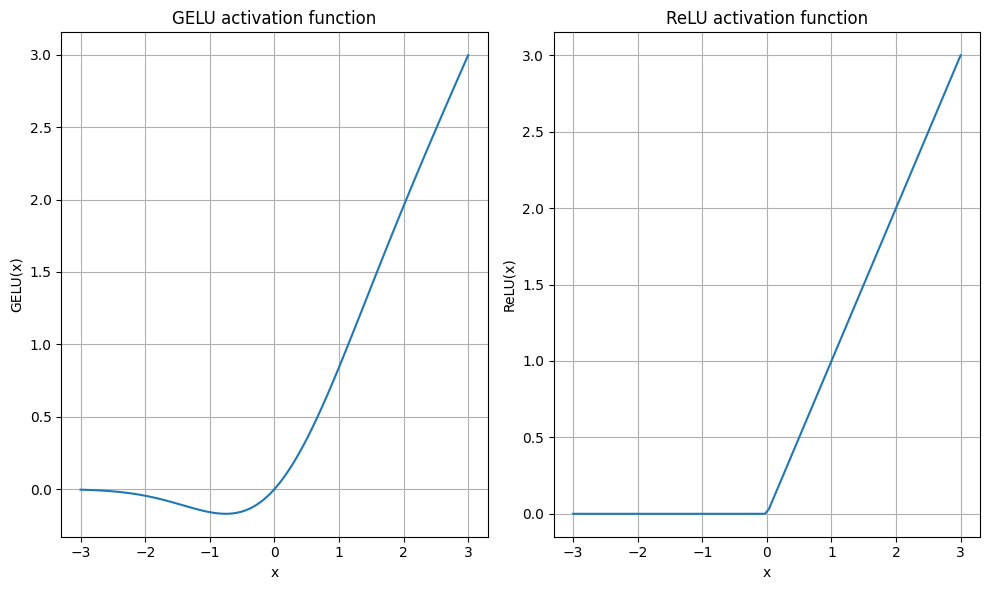

In [93]:
import matplotlib.pyplot as plt
gelu, relu = GELU() , nn.ReLU()

x = torch.linspace(-3,3,100)
y_gelu,y_relu = gelu(x), relu(x)
plt.figure(figsize=(10,6))
for i, (y,label) in enumerate(zip([y_gelu,y_relu],["GELU","ReLU"]),1):
  plt.subplot(1,2,i)
  plt.plot(x,y)
  plt.title(f"{label} activation function")
  plt.xlabel("x")
  plt.ylabel(f"{label}(x)")
  plt.grid(True)
plt.tight_layout()
plt.show()

* The smoothness of GELU can lead to better optimization properties during training, as it allows for more adjustments to the model's parameters.
* The ReLU has a sharp corner at zero, which can sometimes make optimization harder, especially in networks that are very deep or have complex architectures.
* Next, let's use the GELU function to implement the small neural network module, `FeedForward` that we will be using in the LLM's transformer block later.


In [94]:
class FeedForward(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"],4*cfg["emb_dim"]),
        GELU(),
        nn.Linear(4* cfg["emb_dim"],cfg["emb_dim"]),
    )

  def forward(self,x):
    return self.layers(x)

* Now let's initialize a new `FeedForward` module with a token embedding size of 768 and feed it a batch input with two samples and three tokens each:

In [95]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2,3,768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


* The `FeedForward` module plays a crucial role in enhancing the model's ability to learn from and generalize the data.
* Although the input and output dimensions of this module is the same, it internally expands the embedding dimesion into a higher-dimensional space through the first linear layer.
* This expansion is followed by a nonlinear GELU activation and then a contraction back to the original dimension with the second linear transformation.


* Next, we will go over the concept of shortcut connections that we insert between different layers of a neural network, which are important for improving the training performance in deep neural network architectures.

## 4.4 Adding shortcut connections.
* Originally, shortcut connections were proposed for deep networks in computer vision to mitigate the challenge of vanishing gradients.
* The vanishing gradient problem refers to the issue where gradients become progressively smaller as they propagate backward through the layers, making it difficult to effectively train earlier layers.
* These connections play a crucial role in preserving the flow of gradients during the backward pass in training.
* Now let's see how add shortcut connections in `forward` method:

In [96]:
class DummyNeuralNetwork(nn.Module):
  def __init__(self,layer_sizes,use_shortcut):
    super().__init__()
    self.use_shortcut = use_shortcut
    self.layers = nn.ModuleList([ #implements five layers
        nn.Sequential(
            nn.Linear(layer_sizes[0],layer_sizes[1]),
            GELU(),
        ),
        nn.Sequential(
            nn.Linear(layer_sizes[1],layer_sizes[2]),
            GELU(),
        ),
        nn.Sequential(
            nn.Linear(layer_sizes[2],layer_sizes[3]),
            GELU(),
        ),
       nn.Sequential(
            nn.Linear(layer_sizes[3],layer_sizes[4]),
            GELU(),
       ),
       nn.Sequential(
            nn.Linear(layer_sizes[4],layer_sizes[5]),
            GELU(),
       )



    ])

  def forward(self,x):
    for layer in self.layers:
      layer_output = layer(x) #compute the output of the current layer
      if self.use_shortcut and x.shape == layer_output.shape: # check if shortcut can be applied
        x = x + layer_output
      else:
        x = layer_output
    return x

* This code implement a deep neural network with five layers, each consisting of `Linear` layer and `GELU` activation function.
* In the forward pass, we iteratively pass the input through the layers and optionally add connections if the `self.shortcut` attribute is set to `True`.

* Let's use this code to initialize a neural network without shortcut connections.
* Each layer is initialized such that it accepts an example with three input values and returns three output values

In [97]:
layer_sizes = [3,3,3,3,3,1]
sample_input = torch.tensor([[1.,0.,-1]])
torch.manual_seed(123)
model_without_shortcut = DummyNeuralNetwork(layer_sizes,use_shortcut=False)

* Let's implement a function that computes the gradients in the model's backward pass:

In [98]:
def gradients(model,x):
  output = model(x) #forward pass
  target = torch.tensor([[0.]])

  loss = nn.MSELoss()
  loss = loss(output,target)#calculates loss based on close the target and output are

  loss.backward()#backward pass to calculate the gradients

  for name, param in model.named_parameters():
    if 'weight' in name:
      print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

* Let's use the `gradients` function and apply it to the model without skip connections:

In [99]:
gradients(model_without_shortcut,sample_input)

layers.0.0.weight has gradient mean of 0.00020173616940155625
layers.1.0.weight has gradient mean of 0.00012011189392069355
layers.2.0.weight has gradient mean of 0.0007152058533392847
layers.3.0.weight has gradient mean of 0.0013988724676892161
layers.4.0.weight has gradient mean of 0.0050496445037424564


* The output of this function shows, the gradients become smaller as we progress from the last layer to the first layer, this phenomenon is called the `vanishing gradient problem`.

* Now, let's instantiate a model with skip connections to see how different is:

In [100]:
torch.manual_seed(123)
model_with_shortcut = DummyNeuralNetwork(layer_sizes,use_shortcut=True)
gradients(model_with_shortcut,sample_input)

layers.0.0.weight has gradient mean of 0.2217087745666504
layers.1.0.weight has gradient mean of 0.20695072412490845
layers.2.0.weight has gradient mean of 0.3289870023727417
layers.3.0.weight has gradient mean of 0.2665843367576599
layers.4.0.weight has gradient mean of 1.3259057998657227


* The layer layer (layer 4) still has a larger gradient than the others, but, the gradient value stabilizes as we progress toward the first layer (layer 0) and doesn't shrink drastically.

* In summary, the shortcut connections are important for overcoming the limitation posed by the vanishing gradient problem in deep neural networks.

## 4.5 Connecting attention and linear layers in a transformer block.

* Now let's implement the `transformer block`, a fundemental building block GPT and other LLM architectures.
* This block, combines concepts like multi-head attention,layer normalization,dropout,feed forward layers and GELU activations.